#### NAME:- Suraj Singh, SAP ID:- 500122962

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [4]:
# Load the dataset
df = pd.read_csv("C:\\Users\\netus\\Downloads\\BreastCancer.csv")  # Change path if needed

In [5]:
# Drop unnecessary columns
df_cleaned = df.drop(columns=["id", "Unnamed: 32"])

In [6]:
# Encode the 'diagnosis' column: M = 1 (Malignant), B = 0 (Benign)
label_encoder = LabelEncoder()
df_cleaned["diagnosis"] = label_encoder.fit_transform(df_cleaned["diagnosis"])

In [7]:
# Split the data into features and target
X = df_cleaned.drop(columns=["diagnosis"])
y = df_cleaned["diagnosis"]

In [8]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                            y, test_size=0.2, random_state=42)

In [10]:
# Train the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [12]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9649122807017544

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
[[70  1]
 [ 3 40]]


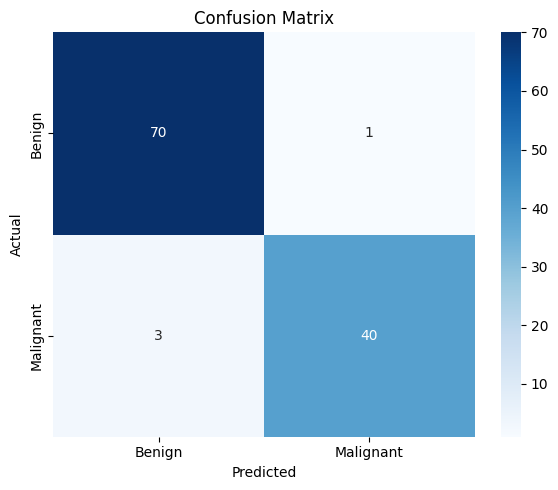

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

C:\Users\netus\AppData\Local\Temp\ipykernel_15188\727774572.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:15], y=feature_names


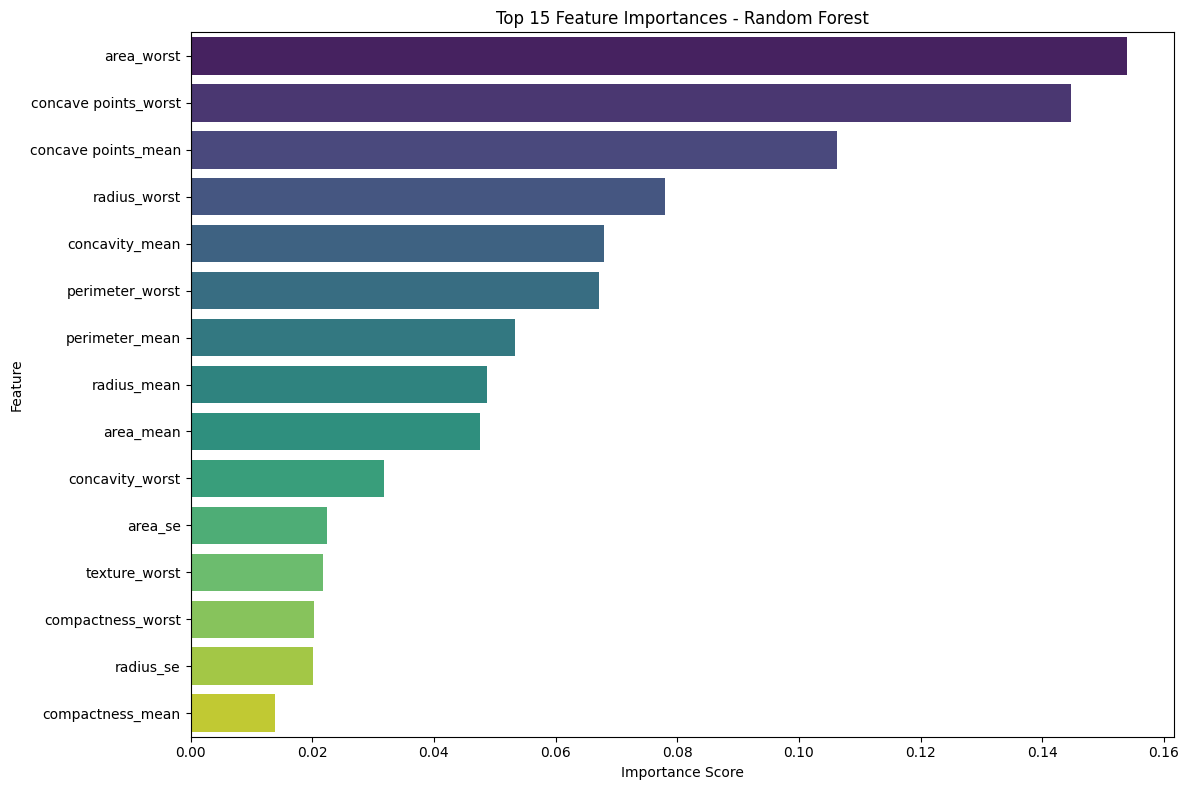

In [14]:
import numpy as np

# Get feature importances and sort them
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot top 15 important features
plt.figure(figsize=(12, 8))
sns.barplot(x=importances[indices][:15], y=feature_names
            [indices][:15], palette="viridis")
plt.title('Top 15 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

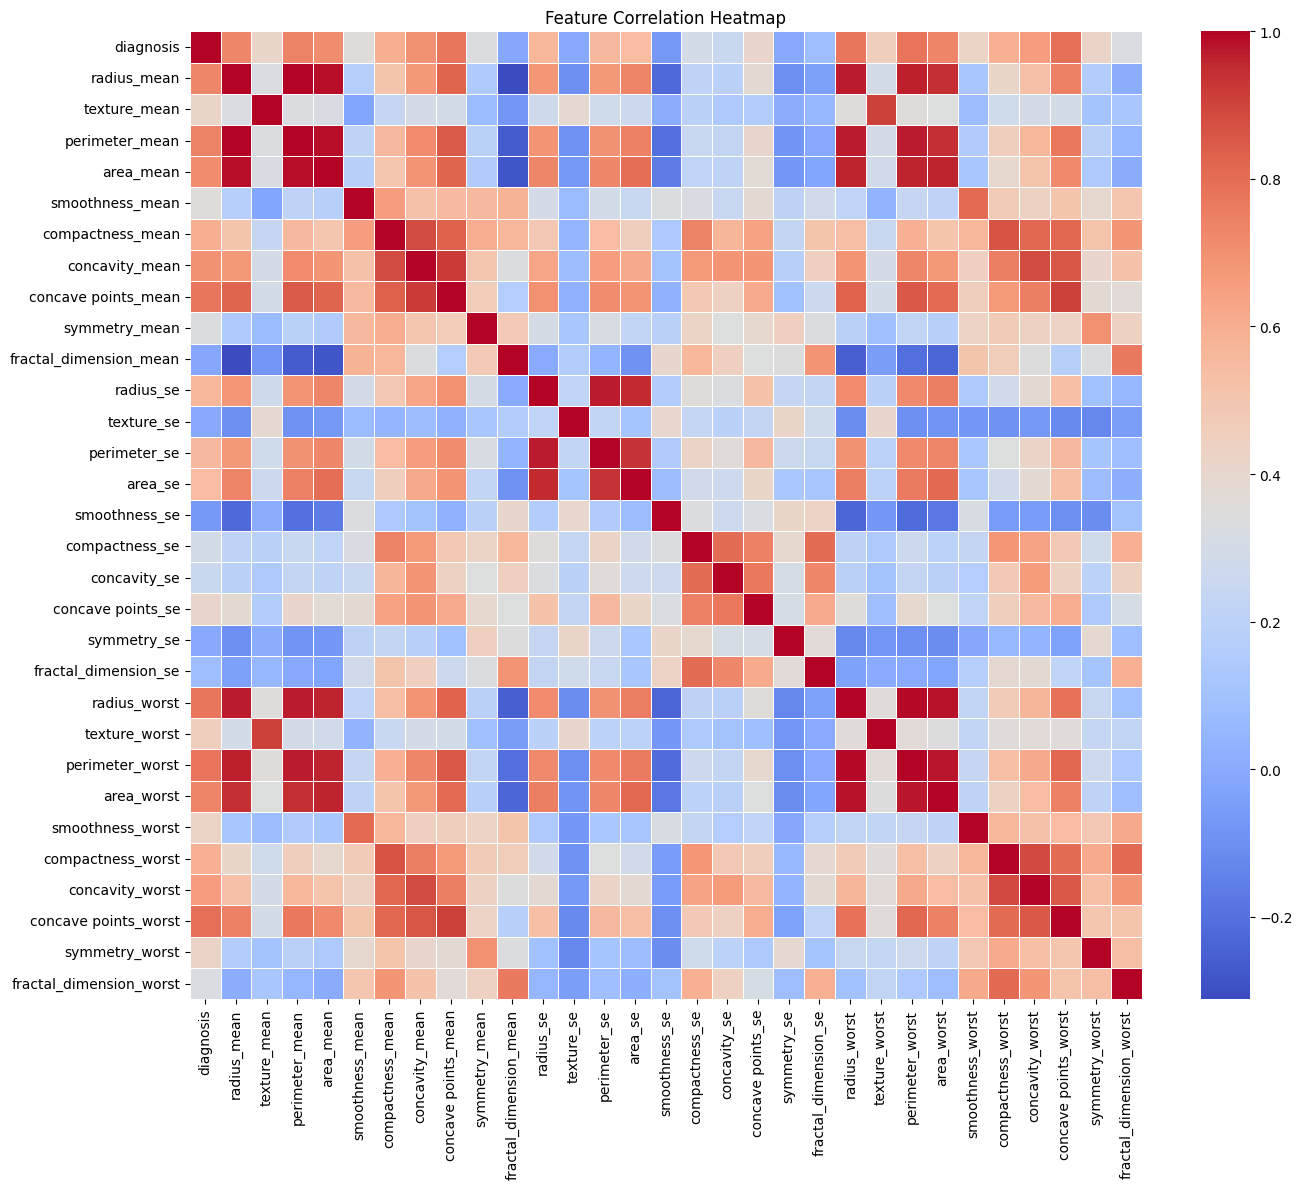

In [15]:
# Compute correlation matrix
corr_matrix = df_cleaned.corr()

# Plot heatmap of correlations
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

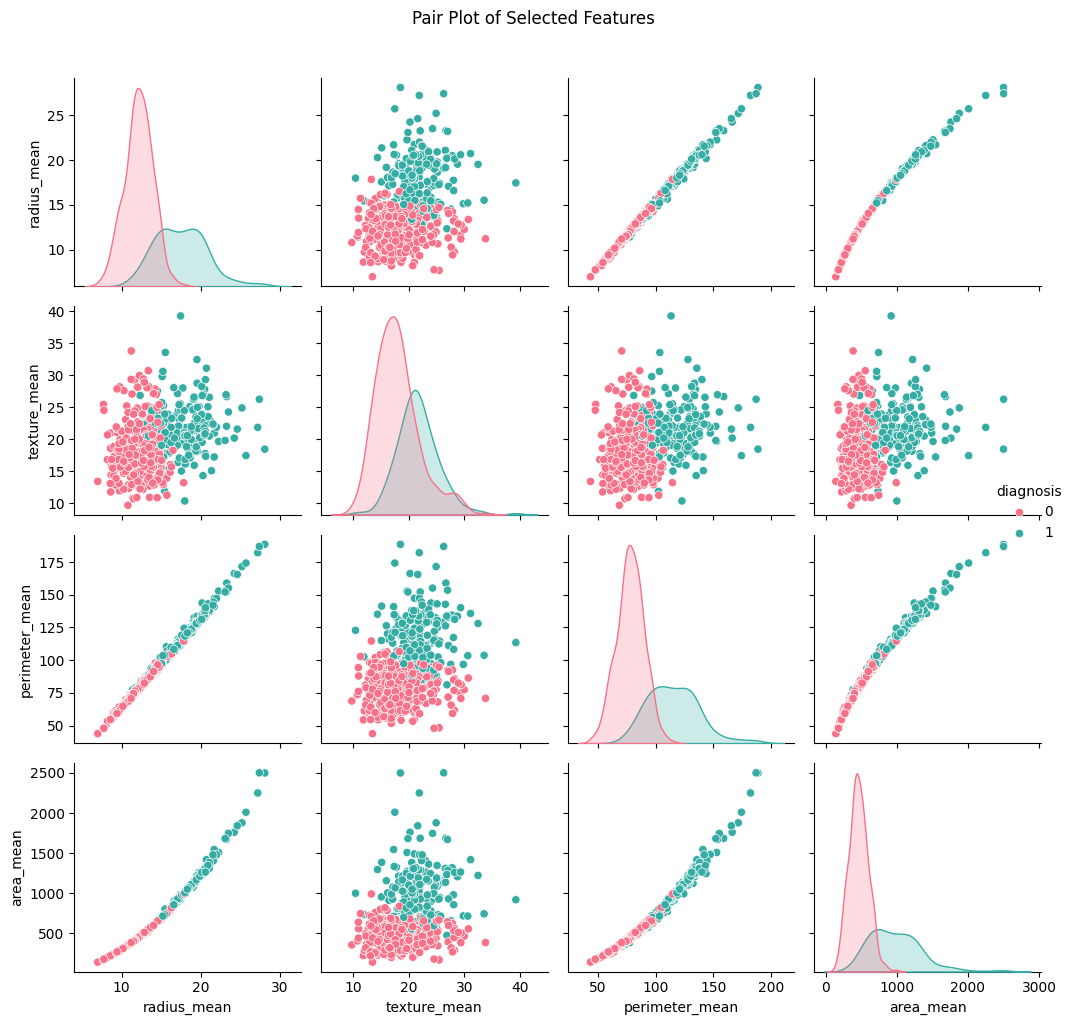

In [16]:
# Select a few important features for pair plot
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']
sns.pairplot(df_cleaned[selected_features], hue='diagnosis', palette='husl', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.tight_layout()
plt.show()

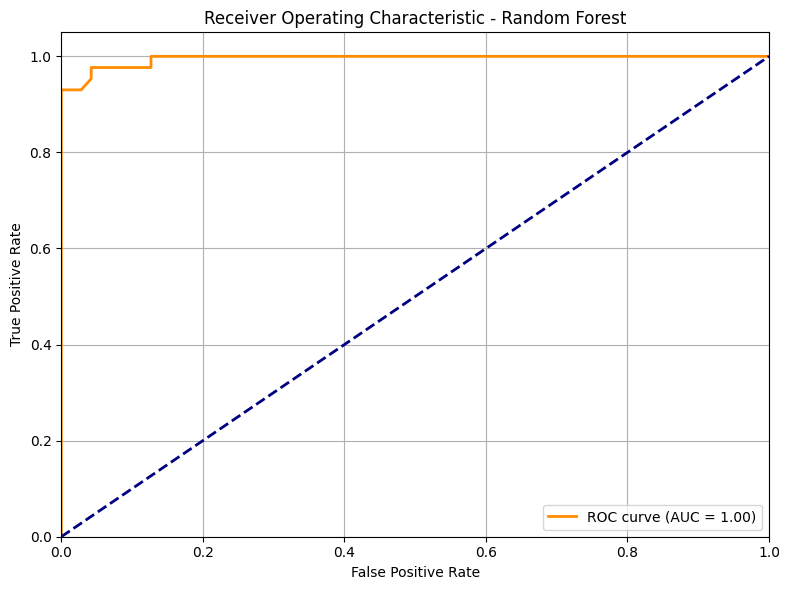

In [17]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for ROC curve
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()